# SPRINT 3

Analistes de Finances i Risc Creditici: Quins llindars de saldo podrien indicar més risc de 
morositat?

In [2]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime
import pymysql

#Datos de conexión
usuario='EquipoB'
contraseña="E1q2u3i4p5oB"
host='212.227.90.6'
puerto=3306
nombre_base_datos='EquipB'

#URL de la conexión
url_conexion=f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

#Crear l'engine de SQLAlchemy
try:
    engine=create_engine(url_conexion)
    cnx=engine.connect()
    print("Conexión correcta")
except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")
    
#Obtener el nombre de les tablas
inspector=inspect(engine)
nombre_tablas=inspector.get_table_names()

# Diccionario para almacenar los DataFrames
df= {}

for tabla in nombre_tablas:
    query=f"SELECT * FROM {tabla}"
    
    try:
        df[tabla] = pd.read_sql(query, cnx)
        print(f"Tabla '{tabla}' cargada correctamente.")
    except Exception as e:
        print(f"Error al cargar la tabla '{tabla}':{e}")
  
# Cerrar la conexión
# cnx.close()

Conexión correcta
Tabla 'BANK_marketing' cargada correctamente.
Tabla 'BANK_marketing131024' cargada correctamente.
Tabla 'BANK_marketing211024' cargada correctamente.
Tabla 'BANK_marketing_backup_211024' cargada correctamente.


In [3]:
plt.style.use("seaborn-v0_8-deep")

In [4]:
df_bank = df['BANK_marketing211024']

df_finanzas = df_bank[['id','age','job','marital','education','default','balance','housing','loan','deposit']]

In [5]:
#df_finanzas.to_csv('C:\\Users\\ueret\\OneDrive\\Escritorio\\SIMULADOR\\s3.csv', index=False)

## EDA: ANÁLISIS EXPLORATÓRIO

Comprobamos los primeros registros del dataframe y la información clave de los campos.

In [6]:
df_finanzas.head()

,id,age,job,marital,education,default,balance,housing,loan,deposit
0,1,59,admin.,married,secondary,0,2343,1,0,1
1,2,59,admin.,married,secondary,0,2343,1,0,1
2,3,56,admin.,married,secondary,0,45,0,0,1
3,4,41,technician,married,secondary,0,1270,1,0,1
4,5,55,services,married,secondary,0,2476,1,0,1


In [7]:
df_finanzas.describe()


,id,age,default,balance,housing,loan,deposit
count,26163.000000,26163.000000,26163.000000,26163.000000,26163.000000,26163.000000,26163.00000
mean,13166.088216,41.278905,0.014830,1522.062607,0.472882,0.132668,0.47357
std,7642.948371,11.965048,0.120875,3254.107270,0.499274,0.339222,0.49931
min,1.000000,18.000000,0.000000,-6847.000000,0.000000,0.000000,0.00000
25%,6541.500000,32.000000,0.000000,123.000000,0.000000,0.000000,0.00000
50%,13082.000000,39.000000,0.000000,543.000000,0.000000,0.000000,0.00000
75%,19842.500000,49.000000,0.000000,1704.000000,1.000000,0.000000,1.00000
max,26383.000000,95.000000,1.000000,81204.000000,1.000000,1.000000,1.00000


In [8]:
df_finanzas.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
deposit      0
dtype: int64

In [9]:
df_finanzas.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
deposit      0
dtype: int64

### 2.1 VISUALIZACIONES DE CADA VARIABLE POR SEPARADO

#### BALANCE/SALDO

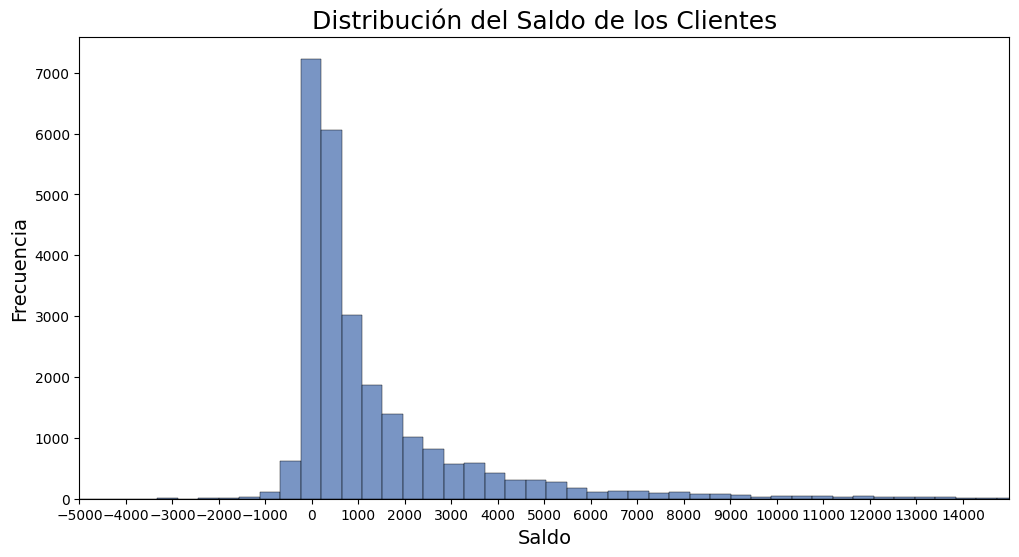

In [10]:
# HACERLO DIFERENTE PARA VISUALIZAR SOLO LOS DATOS Q IMPORTAN
plt.figure(figsize = (12,6))
sns.histplot(data=df_finanzas, x='balance', bins=200)
plt.title('Distribución del Saldo de los Clientes',fontsize=18)
plt.xlabel('Saldo', fontsize = 14)
plt.ylabel('Frecuencia', fontsize = 14)
plt.xlim(-5000, 15000)
plt.xticks(range(-5000,15000,1000), fontsize= 10)
plt.show()

#### INCUMPLIMIENTO DE CRÉDITO

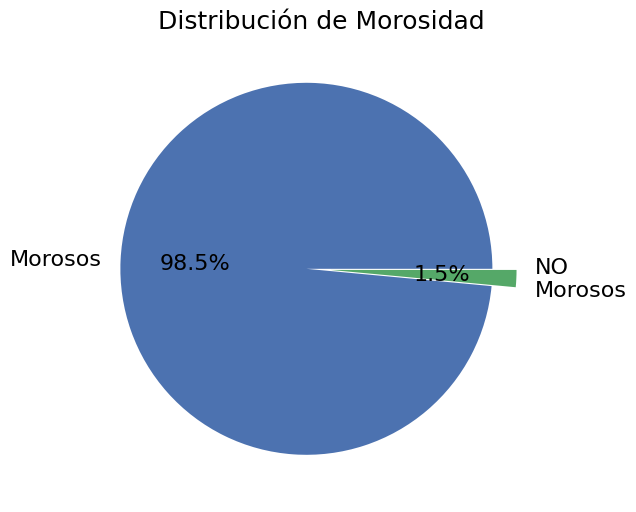

In [24]:
compteig_faltante= df_finanzas['default'].value_counts()
plt.figure(figsize=(6,8))
explode = (0.08, 0.05)
plt.pie(compteig_faltante,
        labels=["Morosos", "NO\nMorosos"], 
        autopct='%1.1f%%', 
        explode= explode,
        textprops={'fontsize': 16} )
plt.title("Distribución de Morosidad", fontsize=18 )
plt.show()

#### 2.2 ANALISIS COMPARATIVO ENTRE VARIABLES:  

Descripción analítica de SALDO segmentado por MOROSIDAD

In [12]:
# Dividimos los datos en dos grupos: morosos (default = 1) y no morosos (default = 0)
morosos = df_finanzas[df_finanzas['default'] == 1]
no_morosos = df_finanzas[df_finanzas['default'] == 0]


morosos = morosos['balance'].describe()
(no_morosos) = no_morosos['balance'].describe()

# Imprimimos los resultados
print("Estadísticas de SALDO para clientes MOROSOS:")
print(morosos)

print("\nEstadísticas de SALDO para clientes NO MOROSOS:")
print(no_morosos)

Estadísticas de SALDO para clientes MOROSOS:
count     388.000000
mean      -14.680412
std       877.080237
min     -6847.000000
25%      -311.000000
50%         0.000000
75%        81.750000
max      5249.000000
Name: balance, dtype: float64

Estadísticas de SALDO para clientes NO MOROSOS:
count    25775.000000
mean      1545.195732
std       3271.236237
min      -3058.000000
25%        132.000000
50%        558.000000
75%       1730.500000
max      81204.000000
Name: balance, dtype: float64


Mientras que la media de SALDO para clientes MOROSOS es de -14.68 y la mediana es 0,
la media de SALDO de clientes NO MOROSOS es de 1545 y la mediana es 558.


Densidad de SALDO segmentado por MOROSIDAD

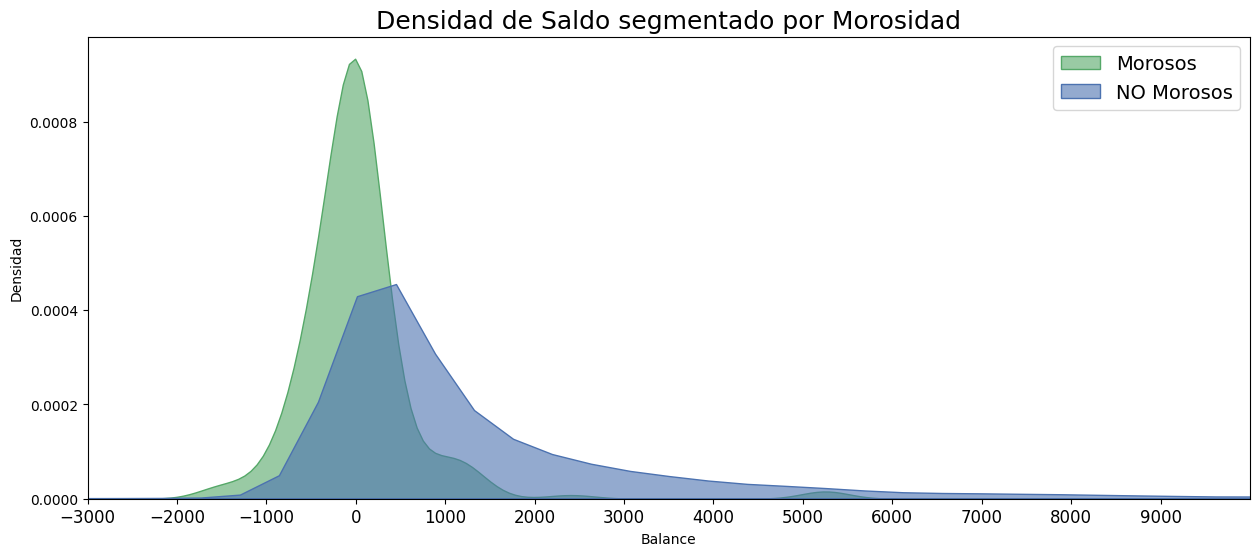

In [22]:
plt.figure(figsize=(15, 6))

sns.kdeplot(data=df_finanzas, x='balance', hue='default', fill=True, common_norm=False, alpha=0.6)

plt.title('Densidad de Saldo segmentado por Morosidad',fontsize=18)
plt.xlabel('Balance')
plt.ylabel('Densidad')
plt.legend (labels=["Morosos", "NO Morosos"],fontsize=14)
plt.xlim(-3000, 10000)
plt.xticks(range(-3000,10000,1000), fontsize= 12)

plt.show()

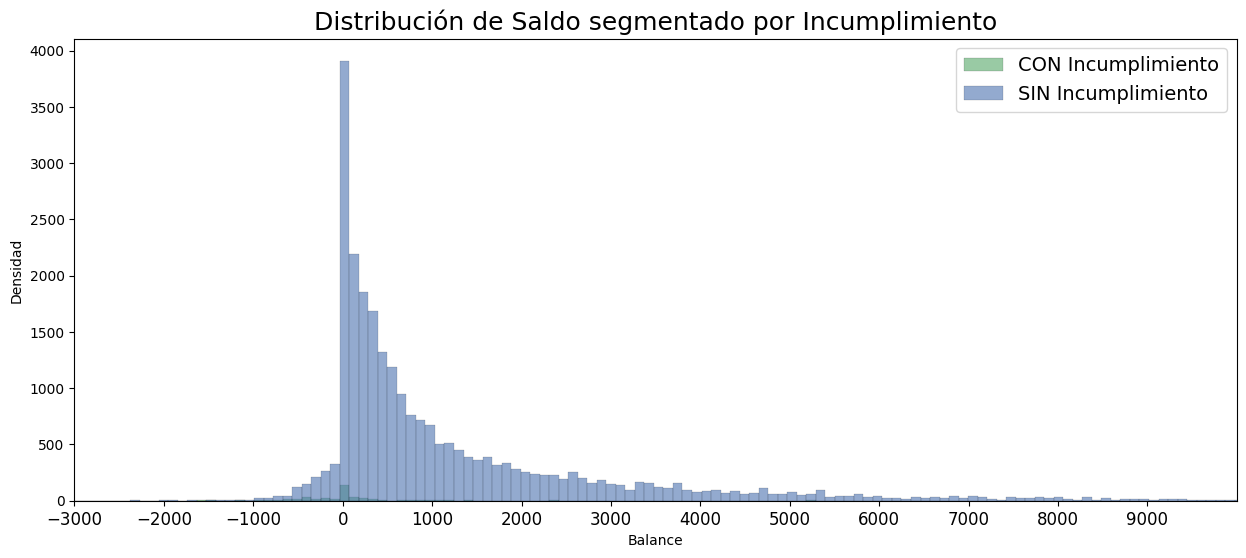

In [14]:
plt.figure(figsize=(15, 6))

sns.histplot(data=df_finanzas, x='balance', hue='default', fill=True, common_norm=False, alpha=0.6)

plt.title('Distribución de Saldo segmentado por Incumplimiento',fontsize=18)
plt.xlabel('Balance')
plt.ylabel('Densidad')
plt.legend (labels=["CON Incumplimiento", "SIN Incumplimiento"],fontsize=14)
plt.xlim(-3000, 10000)
plt.xticks(range(-3000,10000,1000), fontsize= 12)

plt.show()

# 3. ANÁLISIS DE LOS LIMITES DE SALDO Y LA MOROSIDAD

CATEGORIZACIÓN DE BALANCE Y % DE MOROSIDAD

In [15]:
def cuartiles(df):
    #Calcular cuartiles
    Q1 = df.quantile(0.25)
    Q2 = df.quantile(0.50)
    Q3 = df.quantile(0.75)

    #Calcular IQR (rango intercuartílico)
    IQR = Q3 - Q1

    #Calcular límite outliers
    min_Q = Q1 - 1.5*IQR
    max_Q = Q3 + 1.5*IQR
    
    return Q1, Q2, Q3, min_Q, max_Q

Q1, Q2, Q3, min_Q, max_Q = cuartiles(df_finanzas['balance'])

In [16]:
def clasificacion_clientes (balance):
    if balance < min_Q:
        return 'muy bajo'
    elif balance < Q1:
        return 'bajo'
    elif balance < Q2:
        return 'medio-bajo'
    elif balance < Q3:
        return 'medio-alto'
    elif balance < max_Q:
        return 'alto'
    else:
        return 'muy alto'
    
df_finanzas['descripcion_balance'] = df_finanzas['balance'].apply(clasificacion_clientes)

df_finanzas.head()

C:\Users\ueret\AppData\Local\Temp\ipykernel_20956\741264402.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finanzas['descripcion_balance'] = df_finanzas['balance'].apply(clasificacion_clientes)


,id,age,job,marital,education,default,balance,housing,loan,deposit,descripcion_balance
0,1,59,admin.,married,secondary,0,2343,1,0,1,alto
1,2,59,admin.,married,secondary,0,2343,1,0,1,alto
2,3,56,admin.,married,secondary,0,45,0,0,1,bajo
3,4,41,technician,married,secondary,0,1270,1,0,1,medio-alto
4,5,55,services,married,secondary,0,2476,1,0,1,alto


<function matplotlib.pyplot.show(close=None, block=None)>

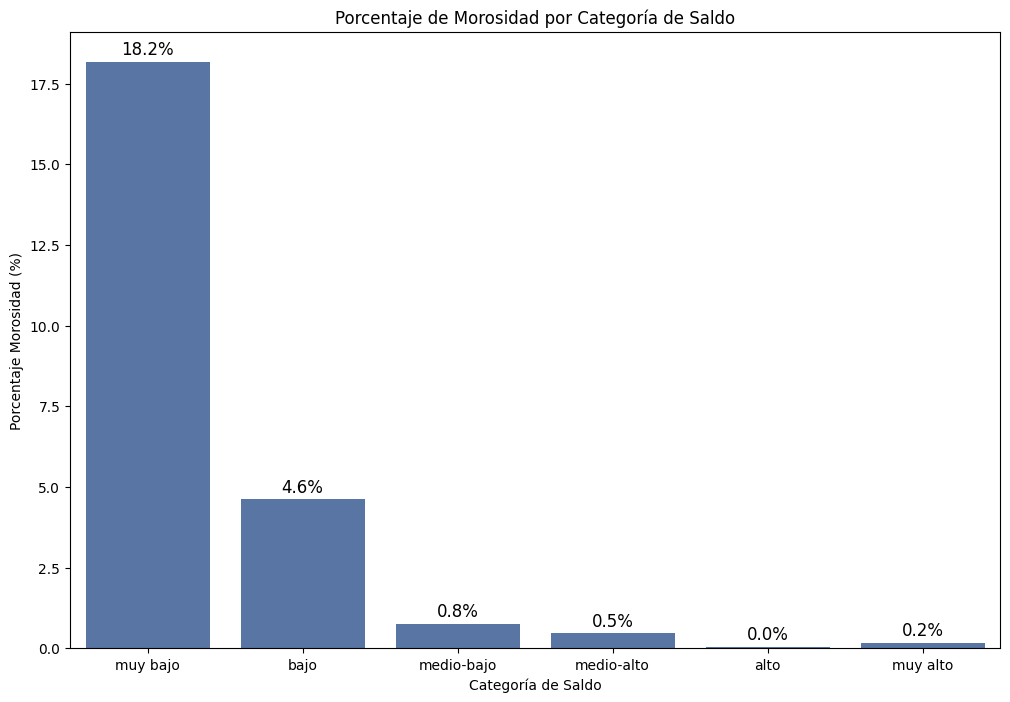

In [17]:
#Calculamos la media
incumplimiento_categoria = df_finanzas.groupby('descripcion_balance')['default'].mean() * 100

#Convertimos a un DataFrame para facilitar la visualización
incumplimiento_categoria = incumplimiento_categoria.reset_index()

order = ['muy bajo', 'bajo', 'medio-bajo', 'medio-alto', 'alto', 'muy alto']
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=incumplimiento_categoria, x='descripcion_balance', y='default', order = order)
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.1f}%',        # El valor de la barra
                     (p.get_x() + p.get_width() / 2., p.get_height()),  # Posición del texto
                     ha='center', va='center',        # Alineación del texto
                     xytext=(0, 9),                  # Desplazamiento del texto desde la barra
                     textcoords='offset points',      # Unidades para el desplazamiento
                     fontsize=12)   
plt.title('Porcentaje de Morosidad por Categoría de Saldo')
plt.xlabel('Categoría de Saldo')
plt.ylabel('Porcentaje Morosidad (%)')
plt.show

In [38]:
# Cálculo del porcentaje medio de incumplimiento por categoría
incumplimiento_categoria = df_finanzas.groupby('descripcion_balance')['default'].mean() * 100

# Obtener los límites de saldo (mínimo y máximo) para cada categoría de balance
limites_saldo = df_finanzas.groupby('descripcion_balance')['balance'].agg(['min', 'max'])

cuenteo = df_finanzas.groupby('descripcion_balance').size()

# Unir DataFrames en un solo resumen
resumen_categoria = incumplimiento_categoria.to_frame().merge(limites_saldo, on='descripcion_balance').merge(cuenteo.to_frame(name='Cantidad Clientes'), on='descripcion_balance').reset_index()
# Renombrar las columnas para mayor claridad
resumen_categoria.columns = ['Categoria', 'Morosidad (%)', 'Saldo Mínimo', 'Saldo Máximo','Cantidad Clientes']

# Mostrar el resumen
print(resumen_categoria)


    Categoria  Morosidad (%)  Saldo Mínimo  Saldo Máximo  Cantidad Clientes
0        alto       0.049008          1704          4071               4081
1        bajo       4.611128         -2049           122               6506
2  medio-alto       0.459067           543          1699               6535
3  medio-bajo       0.761731           123           542               6564
4    muy alto       0.162206          4079         81204               2466
5    muy bajo      18.181818         -6847         -2282                 11


In [28]:
df_finanzas.count()

id                     26163
age                    26163
job                    26163
marital                26163
education              26163
default                26163
balance                26163
housing                26163
loan                   26163
deposit                26163
descripcion_balance    26163
dtype: int64

#### Decidimos hacer tratamiento de Outliers y centrar-nos en la prte del dataset donde estan la inmensa mayoria de clientes y donde tiene lugar el cambio del queal tenemos que buscar el umbral. Así hacemos zoom en el análisis visual y ayudamos a los modelos de classificación a ser más precisos y relevantes.

In [25]:
Q1 = df_finanzas['balance'].quantile(0.25)
Q3 = df_finanzas['balance'].quantile(0.75)
IQR = Q3 - Q1

limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR

df_f_sinoutliers = df[(df_finanzas['balance'] >= limite_inf) & (df_finanzas['balance'] <= limite_sup)]
    
df_f_sinoutliers.head()

TypeError: unhashable type: 'Series'

In [40]:
df_f_sinoutliers.describe()

,id,age,default,balance,housing,loan,deposit
count,23686.000000,23686.000000,23686.000000,23686.000000,23686.000000,23686.000000,23686.000000
mean,13186.613105,40.936671,0.016128,806.669636,0.480326,0.139703,0.463607
std,7625.134696,11.778813,0.125969,992.792950,0.499623,0.346686,0.498684
min,1.000000,18.000000,0.000000,-2049.000000,0.000000,0.000000,0.000000
25%,6620.250000,32.000000,0.000000,96.000000,0.000000,0.000000,0.000000
50%,13068.500000,38.000000,0.000000,440.000000,0.000000,0.000000,0.000000
75%,19845.750000,48.000000,0.000000,1222.000000,1.000000,0.000000,1.000000
max,26383.000000,95.000000,1.000000,4071.000000,1.000000,1.000000,1.000000


ARBOL DE DECISIONES

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Seleccionamos las columnas relevantes
X = df_finanzas[['balance']]  # Variable explicativa
y = df_finanzas['default']    # Variable objetivo

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

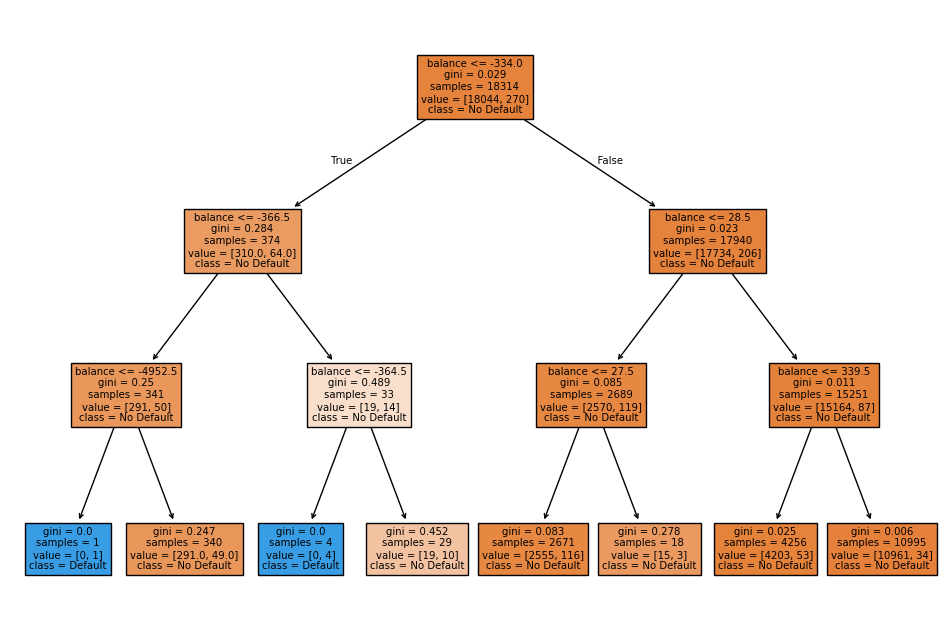

In [58]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=['balance'], class_names=['No Default', 'Default'], filled=True)
plt.show()

Respuesta concreta:
Los umbrales de saldo que podrían indicar mayor riesgo de morosidad son aquellos en los que el saldo es negativo o cercano a cero. Específicamente, el árbol de decisión identifica que los clientes con un saldo inferior a -364,5 tienen una mayor probabilidad de caer en morosidad (default). En contraste, aquellos con un saldo mayor a este umbral tienen un menor riesgo de impago.

En resumen, un saldo bajo o negativo, particularmente por debajo de -364,5, es un fuerte indicador de mayor riesgo de morosidad según el análisis realizado.